In [1]:
########################################
#                HEADER
########################################

import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

# custom modules
import BBH_Analysis as BBH
import statistics as st


########################################
#                CONSTANTS
########################################

### Physical Constants
G = 6.674e-8           # Gravitational Constant [g^-1 s^-2 cm^3]
c = 2.99792458e10      # Speed of Light [cm s^-1]
mp = 1.6726219e-24     # Mass of Proton [g]
me = 9.10938356e-28    # Mass of Electron [g]
kB = 1.380658e-16      # Boltzmann Constant

### Astronomical Constants
AU = 1.496e13          # Astronomical Unit [cm]
pc = 3.085677581e18    # Parsec [cm]

### Solar Constants
Mo = 1.989e33                        # Solar Mass [g]
Ro= 6.955e10                         # Solar Radius [cm]
Lo = 3.9e33                          # Solar Luminosity [erg s^-1]
To = 5.78e3                          # Solar Temperature [K]
Vo= np.sqrt(2*G*Mo/Ro)               # Solar Escape Velocity [cm s^-1]
Rhoo = Mo/((4./3.) * np.pi * Ro**3)  # Solar Average Density [g cm^-3]


########################################
#             CONVERSION FACTORS
########################################

sec_per_year = 3.1536e7
sec_per_day = 60.*60.*24
sec_per_hrs = 60.*60.
sec_per_min = 60.
sec_per_tdyn = np.sqrt(Ro**3/(G*Mo))


# ########################################
# #                RC PARAMS
# ########################################

# ### LINES
# # See http://matplotlib.org/api/artist_api.html#module-matplotlib.lines for more
# # information on line properties.

plt.rc('lines', 
        linewidth = 5,               # line width in points
        linestyle = '-',               # solid line
        marker = 'None',               # the default marker
        markeredgewidth = 1.0,         # the line width around the marker symbol
        markersize = 6,                # markersize, in points
        dash_joinstyle = 'miter',      # miter|round|bevel
        dash_capstyle = 'butt',        # butt|round|projecting
        solid_joinstyle = 'miter',     # miter|round|bevel
        solid_capstyle = 'projecting', # butt|round|projecting
        antialiased = True)            # render lines in antialiased (no jaggies)
        

### AXES
# default face and edge color, default tick sizes,
# default fontsizes for ticklabels, and so on.  See
# http://matplotlib.org/api/axes_api.html#module-matplotlib.axes

plt.rc('axes', 
        facecolor = 'white',    # axes background color
        edgecolor = 'black',    # axes edge color
        linewidth = 0.8,        # edge linewidth
        grid = False,           # display grid or not
        titlesize = 25,    # fontsize of the axes title
        titlepad = 6.0,         # pad between axes and title in points
        labelsize = 20,   # fontsize of the x any y labels
        labelpad = 8.0,         # space between label and axis
        labelweight = 'normal', # weight of the x and y labels
        labelcolor = 'black',
        axisbelow = 'line',     # draw axis gridlines and ticks below
                                # patches (True); above patches but below
                                # lines ('line'); or above all (False)
        xmargin = .05,          # x margin.  
        ymargin = .05,          # y margin
        prop_cycle = plt.cycler('color', ['#00BFFF', # color cycle for plot lines 
                                          '#FF4500', # as list of string colorspecs:
                                          '#2DC22D', # single letter, long name, or
                                          '#801ED9', # web-style hex
                                          '#E60B0D', 
                                          '#F527B6',
                                          '#8C8C8C',
                                          '#FFD700',
                                          '#1f77b4', 
                                          '#ff7f0e', 
                                          '#2ca02c', 
                                          '#d62728', 
                                          '#9467bd',
                                          '#8c564b',
                                          '#e377c2',
                                          '#7f7f7f',
                                          '#bcbd22',
                                          '#17becf']))
                                            
                                            
                                            
                                            

## POLAR AXES
plt.rc('polaraxes', 
        grid = True)    # display grid on polar axes

## 3D AXES
plt.rc('axes3d', 
        grid = True)    # display grid on 3d axes           


### TICKS
# see http://matplotlib.org/api/axis_api.html#matplotlib.axis.Tick

## x ticks
plt.rc('xtick',
        top = False,          # draw ticks on the top side
        bottom = True,        # draw ticks on the bottom side
        color = 'k',          # color of the tick labels
        labelsize = 12, # fontsize of the tick labels
        direction = 'out')    # direction: in, out, or inout

## x major ticks
plt.rc('xtick.major',
        size = 5,      # major tick size in points
        width = 0.8,     # major tick width in points
        pad = 3.5,       # distance to major tick label in points
        top = True,      # draw x axis top major ticks
        bottom = True)   # draw x axis bottom major ticks

## x minor ticks
plt.rc('xtick.minor',
        size = 2,          # minor tick size in points
        width = 0.6,       # minor tick width in points
        pad = 3.4,         # distance to the minor tick label in points
        visible = False, # visibility of minor ticks on x-axis
        top = True,      # draw x axis top minor ticks
        bottom = True)   # draw x axis bottom minor ticks
        
## y ticks
plt.rc('ytick',
        right = False,        # draw ticks on the right side
        left = True,        # draw ticks on the left side
        color = 'k',           # color of the tick labels
        labelsize = 12,  # fontsize of the tick labels
        direction = 'out')     # direction: in, out, or inout

## y major ticks
plt.rc('ytick.major',
        size = 5,       # major tick size in points
        width = 0.8,      # major tick width in points
        pad = 3.5,        # distance to major tick label in points
        left = True,      # draw y axis left major ticks
        right = True)     # draw y axis right major ticks

## y minor ticks
plt.rc('ytick.minor',
        size = 2,           # minor tick size in points
        width = 0.6,        # minor tick width in points
        pad = 3.4,          # distance to the minor tick label in points
        visible = False,    # visibility of minor ticks on y-axis
        left = True,        # draw y axis left minor ticks
        right = True)       # draw y axis right minor ticks
        
### GRIDS

plt.rc('grid',
        color = 'b0b0b0',  # grid color
        linestyle = '-',   # solid
        linewidth = 0.8,   # in points
        alpha = 1.0)       # transparency, between 0.0 and 1.0        
        

### LEGEND
plt.rc('legend',
        loc = 'best',
        frameon = False,         # if True, draw the legend on a background patch
        framealpha = 0.8,       # legend patch transparency
        facecolor = 'inherit',  # inherit from axes.facecolor; or color spec
        edgecolor = '0.8',      # background patch boundary color
        fancybox = True,        # if True, use a rounded box for the 
                                # legend background, else a rectangle
        shadow = False,         # if True, give background a shadow effect
        numpoints = 1,          # the number of marker points in the legend line
        scatterpoints = 1,      # number of scatter points
        markerscale = 1.0,      # the relative size of legend markers vs. original
        fontsize = 16,
        # Dimensions as fraction of fontsize:
        borderpad =  0.4,       # border whitespace
        labelspacing =  0.5,    # the vertical space between the legend entries
        handlelength =  2.0,    # the length of the legend lines
        handleheight =  0.7,    # the height of the legend handle
        handletextpad = 0.8,    # the space between the legend line and legend text
        borderaxespad = 0.5,    # the border between the axes and legend edge
        columnspacing = 2.0)    # column separation
        
### FONT
#
# font properties used by text.Text.  See
# http://matplotlib.org/api/font_manager_api.html for more
# information on font properties.  The 6 font properties used for font
# matching are given below with their default values.
#
# The font.family property has five values: 'serif' (e.g., Times),
# 'sans-serif' (e.g., Helvetica), 'cursive' (e.g., Zapf-Chancery),
# 'fantasy' (e.g., Western), and 'monospace' (e.g., Courier).  Each of
# these font families has a default list of font names in decreasing
# order of priority associated with them.  When text.usetex is False,
# font.family may also be one or more concrete font names.
#
# The font.style property has three values: normal (or roman), italic
# or oblique.  The oblique style will be used for italic, if it is not
# present.
#
# The font.variant property has two values: normal or small-caps.  For
# TrueType fonts, which are scalable fonts, small-caps is equivalent
# to using a font size of 'smaller', or about 83%% of the current font
# size.
#
# The font.weight property has effectively 13 values: normal, bold,
# bolder, lighter, 100, 200, 300, ..., 900.  Normal is the same as
# 400, and bold is 700.  bolder and lighter are relative values with
# respect to the current weight.
#
# The font.stretch property has 11 values: ultra-condensed,
# extra-condensed, condensed, semi-condensed, normal, semi-expanded,
# expanded, extra-expanded, ultra-expanded, wider, and narrower.  This
# property is not currently implemented.
#
# The font.size property is the default font size for text, given in pts.
# 10 pt is the standard value.

# font = {'family': 'serif',
#         'color':  'black',
#         'weight': 'normal',
#         'size': 20,
#         }

plt.rc('font',
        family = 'sans-serif',
        style = 'normal',
        variant = 'normal',
        weight = 'medium',
        stretch = 'normal',
        # note that font.size controls default text sizes.  To configure
        # special text sizes tick labels, axes, labels, title, etc, see the rc
        # settings for axes and ticks. Special text sizes can be defined
        # relative to font.size, using the following values: xx-small, x-small,
        # small, medium, large, x-large, xx-large, larger, or smaller
        size = 20.0)

## SERIF
#plt.rcParams['font.serif'] = ['DejaVu Serif']
#plt.rcParams['font.serif'] = ['Bitstream Vera Serif']
#plt.rcParams['font.serif'] = ['New Century Schoolbook']
#plt.rcParams['font.serif'] = ['Century Schoolbook L']
#plt.rcParams['font.serif'] = ['Utopia']
#plt.rcParams['font.serif'] = ['ITC Bookman']
#plt.rcParams['font.serif'] = ['Bookman']
#plt.rcParams['font.serif'] = ['Nimbus Roman No9 L']
#plt.rcParams['font.serif'] = ['Times New Roman']
#plt.rcParams['font.serif'] = ['Times']
#plt.rcParams['font.serif'] = ['Palatino']
#plt.rcParams['font.serif'] = ['Charter']
#plt.rcParams['font.serif'] = ['serif']

## SANS-SERIF
#plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
#plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
#plt.rcParams['font.sans-serif'] = ['Lucida Grande']
plt.rcParams['font.sans-serif'] = ['Verdana']
#plt.rcParams['font.sans-serif'] = ['Geneva']
#plt.rcParams['font.sans-serif'] = ['Lucid']
#plt.rcParams['font.sans-serif'] = ['Arial']
#plt.rcParams['font.sans-serif'] = ['Helvetica']
#plt.rcParams['font.sans-serif'] = ['Avant Garde']
#plt.rcParams['font.sans-serif'] = ['sans-serif']

## CURSIVE
#plt.rcParams['font.cursive'] = ['Apple Chancery']
#plt.rcParams['font.cursive'] = ['Textile']
#plt.rcParams['font.cursive'] = ['Zapf Chancery']
#plt.rcParams['font.cursive'] = ['Sand']
#plt.rcParams['font.cursive'] = ['Script MT']
#plt.rcParams['font.cursive'] = ['Felipa']
#plt.rcParams['font.cursive'] = ['cursive']

## FANTASY
#plt.rcParams['font.fantasy'] = ['Comic Sans MS']
#plt.rcParams['font.fantasy'] = ['Chicago']
#plt.rcParams['font.fantasy'] = ['Charcoal']
#plt.rcParams['font.fantasy'] = ['Impact']
#plt.rcParams['font.fantasy'] = ['Western']
#plt.rcParams['font.fantasy'] = ['Humor Sans']
#plt.rcParams['font.fantasy'] = ['xkcd']
#plt.rcParams['font.fantasy'] = ['fantasy']
        
## MONOSPACE    
#plt.rcParams['font.monospace'] = ['DejaVu Sans Mono']
#plt.rcParams['font.monospace'] = ['Bitstream Vera Sans Mono']
#plt.rcParams['font.monospace'] = ['Andale Mono']
#plt.rcParams['font.monospace'] = ['Nimbus Mono L']
#plt.rcParams['font.monospace'] = ['Courier New']
#plt.rcParams['font.monospace'] = ['Courier']
#plt.rcParams['font.monospace'] = ['Fixed']
#plt.rcParams['font.monospace'] = ['Terminal']
#plt.rcParams['font.monospace'] = ['monospace']
        
### FIGURE
# See http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure

plt.rc('figure',
        titlesize = 'large',       # size of the figure title (Figure.suptitle())
        titleweight = 'normal',    # weight of the figure title
        figsize = (8,5),        # figure size in inches
        dpi = 100,                 # figure dots per inch
        facecolor = 'white',       # figure facecolor; 0.75 is scalar gray
        edgecolor = 'white',       # figure edgecolor
        autolayout = False,        # When True, automatically adjust subplot
                                   # parameters to make the plot fit the figure
        max_open_warning = 20)     # The maximum number of figures to open through
                                   # the pyplot interface before emitting a warning.
                                   # If less than one this feature is disabled.

## SUBPLOT
plt.rc('figure.subplot',  #All dimensions are a fraction of the
        left = 0.125,     # the left side of the subplots of the figure
        right = 0.9,      # the right side of the subplots of the figure
        bottom = 0.11,    # the bottom of the subplots of the figure
        top = 0.88,       # the top of the subplots of the figure
        wspace = 0.2,     # the amount of width reserved for blank space between subplots,
                          # expressed as a fraction of the average axis width
        hspace = 0.2)     # the amount of height reserved for white space between subplots
                          # expressed as a fraction of the average axis height
                          
## IMAGES
plt.rc('image',
        aspect = 'equal',           # equal | auto | a number
        interpolation = 'nearest',  # see help(imshow) for options
        cmap = 'viridis',           # A colormap name, gray etc...
        lut  = 256,                 # the size of the colormap lookup table
        origin = 'upper',             # lower | upper
        resample = True,
        composite_image = True)     # When True, all the images on a set of axes are
                                    # combined into a single composite image before
                                    # saving a figure as a vector graphics file,
                                    # such as a PDF.

### CONTOUR PLOTS
plt.rc('contour',
        negative_linestyle = 'dashed', # dashed | solid
        corner_mask = True)            # True | False | legacy

### ERRORBAR PLOTS
plt.rc('errorbar',
        capsize = 0)              # length of end cap on error bars in pixels

### HISTOGRAM PLOTS
plt.rc('hist',
        bins = 10)                # The default number of histogram bins.
                                  # If Numpy 1.11 or later is
                                  # installed, may also be `auto`

### SCATTER PLOTS
plt.rc('scatter',
        marker = 'o')               # The default marker type for scatter plots.
        
### SAVING FIGURES
# the default savefig params can be different from the display params
# e.g., you may want a higher resolution, or to make the figure
# background white

plt.rc('savefig',
        dpi = 'figure',         # figure dots per inch or 'figure'
        facecolor = 'white',    # figure facecolor when saving
        edgecolor = 'white',    # figure edgecolor when saving
        format = 'png',         # png, ps, pdf, svg
        bbox = 'standard',      # 'tight' or 'standard'.
                                # 'tight' is incompatible with pipe-based animation
                                # backends but will workd with temporary file based ones:
                                # e.g. setting animation.writer to ffmpeg will not work,
                                # use ffmpeg_file instead
        pad_inches = 0.1,       # Padding to be used when bbox is set to 'tight'
        jpeg_quality = 95,      # when a jpeg is saved, the default quality parameter.
        directory = '~',        # default directory in savefig dialog box,
                                # leave empty to always use current working directory
        transparent = False)    # setting that controls whether figures are saved with a
                                # transparent background by default

Constants defined.



In [58]:
from astropy.table import Table
import h5py as h

In [59]:
mac = 'Martin'
macbook = 'martinlopezjr'

path_100k = '/Users/' + mac + '/Dropbox/out/P/n3.0/100k/1M1R-15M15M_21a0.5e/214r0rp/run1/first_10_tdyn_snaps/'

In [60]:
id_BH1_100k = 92977 #disrupting BH
id_BH2_100k = 92978 

Rstar = 1. * Ro
Mstar = 1. * Mo
mBH = 15. * Mo
mu = G*(mBH*2)
mu_star = G*(mBH + Mstar)
mu_mbm = G*mBH
e_binary = 0.5
r_tau = st.r_tau(Mstar,Rstar,mBH)/Ro

mdot_radius = r_tau/4

# initializing class 

In [83]:
reload(BBH)

OS = BBH.PhysicalQuantities(path_100k, longsim=False, id_BH1=id_BH1_100k, id_BH2=id_BH2_100k,
                            snapfactor=1)

Constants defined.



# init

In [84]:
init_filename = 'Data_HDF5/OS/OS_init_ten.hdf5'

## initial creation of init HDF5 file

In [49]:
OS.write_hdf5(write_file=init_filename, list_type='init')

reading snapshot 0
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
reading snapshot 1
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
reading snapshot 2
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,   

In [73]:
OS.init()

reading snapshot 0
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
reading snapshot 1
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
reading snapshot 2
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,   

([array([array([[  4.32947016, -19.83121109, -18.47873116],
         [  4.32248211, -19.83922577, -18.47439384],
         [  4.3357687 , -19.83773994, -18.48191071],
         ...,
         [  4.1575489 , -19.94974899, -18.54696846],
         [  4.1576786 , -19.95097733, -18.56010628],
         [  4.14378166, -19.95132828, -18.5659256 ]]),
         array([[  4.41569424, -20.06332016, -18.15061951],
         [  4.40243244, -20.05783653, -18.15280914],
         [  4.40849161, -20.04959106, -18.15246964],
         ...,
         [  4.35528231, -19.63903999, -18.11753654],
         [  4.34566498, -19.66230774, -18.11172676],
         [  4.34513187, -19.67572403, -18.12632942]]),
         array([[  4.4933629 , -19.84149551, -18.33828926],
         [  4.48882055, -19.86169815, -18.33583641],
         [  4.47762299, -19.86069679, -18.32420731],
         ...,
         [  4.50190306, -19.6366787 , -18.04522514],
         [  4.50812101, -19.6576767 , -18.06637383],
         [  4.50061798, -19.6586

In [80]:
print OS.data_BH_list[-3]['id']

[92977. 92978.]


In [71]:
print bool_BH1_array

[array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(0), array(0), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(0), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(0),

## read in init HDF5 file

In [64]:
init_list = OS.read_hdf5(read_file=init_filename)

bool_BH1_array is index 0
bool_BH2_array is index 1
data_pos_BH_array is index 2
data_pos_gas_array is index 3
data_vel_BH_array is index 4
data_vel_gas_array is index 5
mBH1_array is index 6
mBH2_array is index 7
mBHtotal_array is index 8
mgas_array is index 9
mgas_total_array is index 10

read file Data_HDF5/OS/OS_init_ten.hdf5


In [67]:

bool_BH1_array = init_list[0]

# mdot

In [85]:
mdot_filename = 'Data_HDF5/OS/OS_mdot_ten.hdf5'

## Initial creation of mdot HDF5 file

In [86]:
OS.write_hdf5(write_file=mdot_filename, use_init_file=True, list_type='mdot', mdot_radius=mdot_radius,
               init_file = init_filename)

bool_BH1_array is index 0
bool_BH2_array is index 1
data_pos_BH_array is index 2
data_pos_gas_array is index 3
data_vel_BH_array is index 4
data_vel_gas_array is index 5
mBH1_array is index 6
mBH2_array is index 7
mBHtotal_array is index 8
mgas_array is index 9
mgas_total_array is index 10

read file Data_HDF5/OS/OS_init_ten.hdf5
reading snapshot 0
1
0
reading snapshot 1
1
0
reading snapshot 2
1
0
reading snapshot 3
1
0
reading snapshot 4
1
0
reading snapshot 5
1
0
reading snapshot 6
1
0
reading snapshot 7
1
0
reading snapshot 8
1
0
reading snapshot 9
1
0
reading snapshot 10
1
0
reading snapshot 11
1
0
reading snapshot 12
1
0
reading snapshot 13
1
0
reading snapshot 14
1
0
reading snapshot 15
1
0
reading snapshot 16
1
0
reading snapshot 17
1
0
reading snapshot 18
1
0
reading snapshot 19
1
0
reading snapshot 20
1
0
reading snapshot 21
1
0
reading snapshot 22
1
0
reading snapshot 23
1
0
reading snapshot 24
1
0
reading snapshot 25
1
0
reading snapshot 26
1
0
reading snapshot 27
1
0
readin

## read in mdot HDF5 file

In [87]:
mdot_list = OS.read_hdf5(mdot_filename)

N_mdotBH1_array is index 0
N_mdotBH1_bound_array is index 1
N_mdotBH2_array is index 2
N_mdotBH2_bound_array is index 3
N_mdotBHCM_array is index 4
N_mdotBHCM_bound_array is index 5
dmdt_BH1_array is index 6
dmdt_BH2_array is index 7
dmdt_BHCM_array is index 8
mdot_tot_BH1_array is index 9
mdot_tot_BH2_array is index 10
mdot_tot_BHCM_array is index 11

read file Data_HDF5/OS/OS_mdot_ten.hdf5


In [88]:
dmdt_BH1_array = mdot_list[6]
dmdt_BH2_array = mdot_list[7]

In [90]:
print dmdt_BH2_array

[array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(0.), array(1.59109407e-08), array(9.08929418e-07), array(6.02180008e-06), array(2.01782279e-05), array(9.89976969e-06), array(-3.06854526e-05), array(-5.32818351e-06), array(-3.99378081e-08), array(0.), array(0.), array(0.)

## Smoothing mdot

In [44]:
nbin = 1000

table_smooth_BH1_100k = OS.bin_dmdt(dmdt_BH1_array,nbin)
numsnap_smooth_BH1_100k = table_smooth_BH1_100k['numsnap_smooth']
dmdt_smooth_BH1_100k = table_smooth_BH1_100k['dmdt_smooth']
M_integ_BH1_100k = table_smooth_BH1_100k['M_integ']

table_smooth_BH2_100k = OS.bin_dmdt(dmdt_BH2_array,nbin)
numsnap_smooth_BH2_100k = table_smooth_BH2_100k['numsnap_smooth']
dmdt_smooth_BH2_100k = table_smooth_BH2_100k['dmdt_smooth']
M_integ_BH2_100k = table_smooth_BH2_100k['M_integ']

In [45]:
M_accr1_100k = M_integ_BH1_100k * Mo
M_accr2_100k = M_integ_BH2_100k * Mo

# print 'Integrated accreted mass for BH1:', round(M_accr1_100k/Mo,2), 'Mo'
# print 'Integrated accreted mass for BH2:', round(M_accr2_100k/Mo,2), 'Mo\n'

In [46]:
# start of the accretion
accr_start = (sec_per_tdyn/sec_per_day) * np.min(10**(numsnap_smooth_BH2_100k))
disr_start = (sec_per_tdyn/sec_per_day) * 8

# these are the snapshots that I'm using under this plot
TDE1_snap = (sec_per_tdyn/sec_per_day) * 13 
TDE2_snap = (sec_per_tdyn/sec_per_day) * 775

# these are the times of disruption AFTER initial disruption

TDE1_true = TDE1_snap - accr_start
TDE2_true = TDE2_snap - accr_start

(array([-2.50e-06,  0.00e+00,  2.50e-06,  5.00e-06,  7.50e-06,  1.00e-05,
         1.25e-05,  1.50e-05,  1.75e-05,  2.00e-05,  2.25e-05]),
 <a list of 11 Text yticklabel objects>)

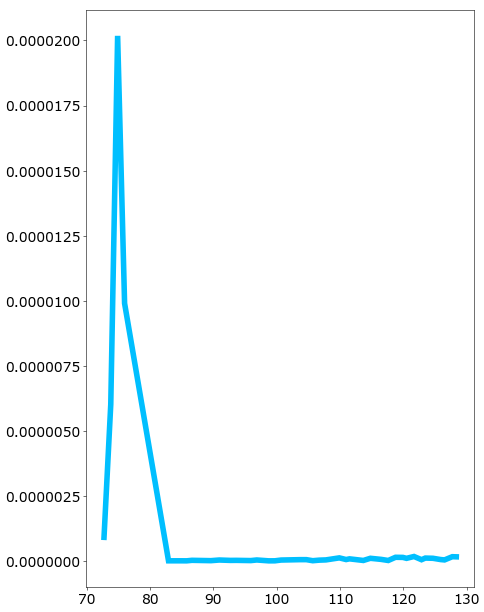

In [47]:
plt.figure(figsize=(10,15),dpi=50)

plt.plot(10**(numsnap_smooth_BH1_100k[1:]),dmdt_smooth_BH1_100k[1:],'deepskyblue',linestyle = '--', lw = 8, label = r'$\rm{BH}_1$, $\rm{R}_{\rm{f}} = $' + str(round(mdot_radius,1)) + r'$\rm{R}_{\odot}$',alpha = 1)
plt.plot(10**(numsnap_smooth_BH2_100k[1:]),dmdt_smooth_BH2_100k[1:],'deepskyblue', lw = 8, label = r'$\rm{BH}_2$, $\rm{R}_{\rm{f}} = $' + str(round(mdot_radius,1)) + r'$\rm{R}_{\odot}$',alpha = 1)

# plt.vlines(TDE1_snap,np.min(dmdt_smooth_BH1_100k),5e-6,lw = 8)
# plt.vlines(TDE2_snap,np.min(dmdt_smooth_BH1_100k),5e-6,lw = 8)

plt.xticks(size = 20)
plt.yticks(size = 20)
# plt.loglog()

# plt.xlim((sec_per_tdyn/sec_per_day) * np.min(10**(numsnap_smooth_BH2_100k[1:])),(sec_per_tdyn/sec_per_day) * np.max(10**(numsnap_smooth_BH2_100k[1:]))+10)
# plt.ylim(np.min(dmdt_smooth_BH1_100k),5e-6)

# plt.text(TDE1_snap + 0.02,5e-8,'t = ' + str(round(TDE1_true,2)) + ' days', size = 75)
# plt.text(TDE2_snap + 1,5e-8, 't = ' + str(round(TDE2_true,2)) + ' days', size = 75)

# plt.text(4.5e1,3.0e-6,'OS', size = 75)

# plt.legend(loc=(0.4,0.8),ncol=1,frameon = False,
#            fontsize = 15, prop={'family':'serif','size':25})

# plt.xlabel('time [days]',size = 20)
# plt.ylabel(r'$\dot{\rm{M}}$ [$\rm{M}_{\odot}/\rm{s}$]',size = 20)
# plt.tight_layout(pad=1.5, w_pad=1.6, h_pad=1.3)
# plt.savefig('Figures/Figure4a.eps')

# position

In [91]:
pos_filename = 'Data_HDF5/OS/OS_pos_ten.hdf5'

## Initial creation of pos HDF5 file

In [92]:
OS.write_hdf5(write_file=pos_filename, use_init_file=True, list_type='pos', init_file=init_filename)

bool_BH1_array is index 0
bool_BH2_array is index 1
data_pos_BH_array is index 2
data_pos_gas_array is index 3
data_vel_BH_array is index 4
data_vel_gas_array is index 5
mBH1_array is index 6
mBH2_array is index 7
mBHtotal_array is index 8
mgas_array is index 9
mgas_total_array is index 10

read file Data_HDF5/OS/OS_init_ten.hdf5
reading snapshot 0
reading snapshot 1
reading snapshot 2
reading snapshot 3
reading snapshot 4
reading snapshot 5
reading snapshot 6
reading snapshot 7
reading snapshot 8
reading snapshot 9
reading snapshot 10
reading snapshot 11
reading snapshot 12
reading snapshot 13
reading snapshot 14
reading snapshot 15
reading snapshot 16
reading snapshot 17
reading snapshot 18
reading snapshot 19
reading snapshot 20
reading snapshot 21
reading snapshot 22
reading snapshot 23
reading snapshot 24
reading snapshot 25
reading snapshot 26
reading snapshot 27
reading snapshot 28
reading snapshot 29
reading snapshot 30
reading snapshot 31
reading snapshot 32
reading snapshot 3

## read in pos HDF5 file

In [98]:
OS.init_pos()

reading snapshot 0
reading snapshot 1
reading snapshot 2
reading snapshot 3
reading snapshot 4
reading snapshot 5
reading snapshot 6
reading snapshot 7
reading snapshot 8
reading snapshot 9
reading snapshot 10
reading snapshot 11
reading snapshot 12
reading snapshot 13
reading snapshot 14
reading snapshot 15
reading snapshot 16
reading snapshot 17
reading snapshot 18
reading snapshot 19
reading snapshot 20
reading snapshot 21
reading snapshot 22
reading snapshot 23
reading snapshot 24
reading snapshot 25
reading snapshot 26
reading snapshot 27
reading snapshot 28
reading snapshot 29
reading snapshot 30
reading snapshot 31
reading snapshot 32
reading snapshot 33
reading snapshot 34
reading snapshot 35
reading snapshot 36
reading snapshot 37
reading snapshot 38
reading snapshot 39
reading snapshot 40
reading snapshot 41
reading snapshot 42
reading snapshot 43
reading snapshot 44
reading snapshot 45
reading snapshot 46
reading snapshot 47
reading snapshot 48
reading snapshot 49
reading sn

([[array([-10.80918026,  19.06787491,  -3.43447757]),
   array([-10.85454082,  19.07444382,  -3.43338251]),
   array([-10.89985943,  19.08092499,  -3.43228865]),
   array([-10.94513702,  19.08732033,  -3.43119621]),
   array([-10.99037361,  19.09362984,  -3.43010521]),
   array([-11.03556824,  19.09985161,  -3.4290154 ]),
   array([-11.08072186,  19.10598946,  -3.42792702]),
   array([-11.12583351,  19.11204338,  -3.42683983]),
   array([-11.17090321,  19.11800957,  -3.42575431]),
   array([-11.21593189,  19.12389374,  -3.42466998]),
   array([-11.26091957,  19.12969208,  -3.42358708]),
   array([-11.30586433,  19.13540649,  -3.42250538]),
   array([-11.35076714,  19.14103508,  -3.42142534]),
   array([-11.39562893,  19.14658165,  -3.42034674]),
   array([-11.44044781,  19.1520462 ,  -3.41926932]),
   array([-11.48522568,  19.15742493,  -3.41819358]),
   array([-11.52996063,  19.16272163,  -3.41711926]),
   array([-11.57465458,  19.16793633,  -3.41604638]),
   array([-11.61930561,  19.

In [93]:
pos_list = OS.read_hdf5(pos_filename)

d_gasCM2BH1_array is index 0
d_gasCM2BH2_array is index 1
d_gasCM2BHCM_array is index 2
pos_BH1_list is index 3
pos_BH2_list is index 4
pos_BHCM_list is index 5
pos_gasCM2BH1_list is index 6
pos_gasCM2BH2_list is index 7
pos_gasCM2BHCM_list is index 8
pos_gasCM_list is index 9
separation_array is index 10

read file Data_HDF5/OS/OS_pos_teb.hdf5


In [96]:
d_gasCM2BH1_array = pos_list[0]
d_gasCM2BH2_array = pos_list[1]
d_gasCM2BHCM_array = pos_list[2]

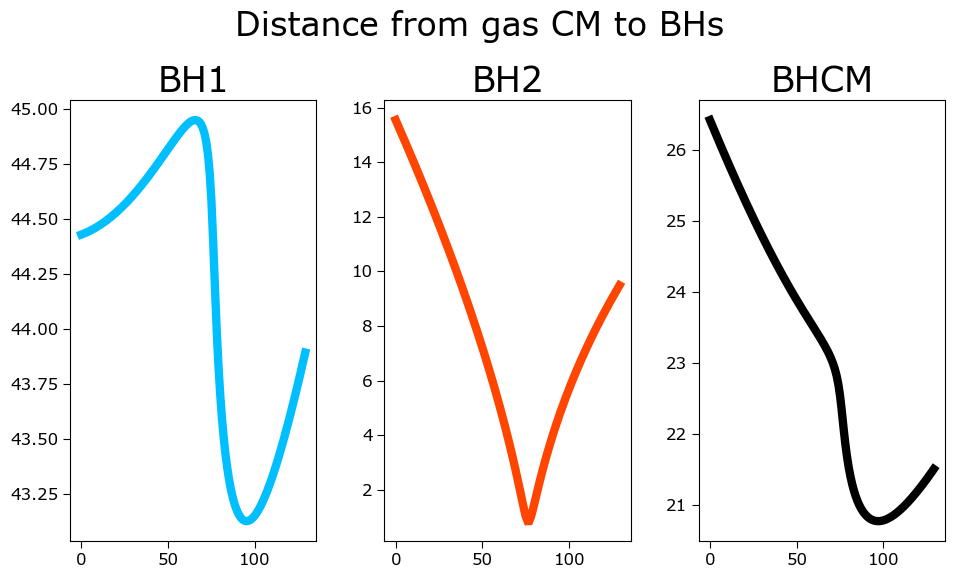

In [99]:
pos_fig = plt.figure(figsize=(10,6))
pos_ax1 = pos_fig.add_subplot(1,3,1)
pos_ax2 = pos_fig.add_subplot(1,3,2)
pos_ax3 = pos_fig.add_subplot(1,3,3)

# subplot 1: gasCM2BH1
pos_ax1.plot(OS.numsnap,d_gasCM2BH1_array, lw=6)
# pos_ax1.set_xlabel('Snapshots')
# pos_ax1.set_ylabel(r'$\rm{L}/\rm{L}_{0} - 1$')
pos_ax1.set_title('BH1')
# pos_ax1.legend()

# subplot 2: gasCM2BH2
pos_ax2.plot(OS.numsnap,d_gasCM2BH2_array, c='orangered', lw=6)
# pos_ax2.set_xlabel('Snapshots')
# pos_ax2.set_ylabel(r'$\rm{L}/\rm{L}_{0} - 1$')
pos_ax2.set_title('BH2')
pos_ax2.legend()

# subplot 2: gasCM2BHCM
pos_ax3.plot(OS.numsnap,d_gasCM2BHCM_array, c='k', lw=6)
# pos_ax2.set_xlabel('Snapshots')
# pos_ax2.set_ylabel(r'$\rm{L}/\rm{L}_{0} - 1$')
pos_ax3.set_title('BHCM')
pos_ax3.legend()


pos_fig.suptitle('Distance from gas CM to BHs')

pos_fig.tight_layout()
pos_fig.subplots_adjust(top=0.83)

# #saving figure
# pos_fig.savefig('Figures/L_tot_change.png')

# velocity

In [100]:
vel_filename = 'Data_HDF5/OS/OS_vel_ten.hdf5'

## Initial creation of vel HDF5 file

In [101]:
OS.write_hdf5(write_file=vel_filename, use_init_file=True, list_type='vel', init_file=init_filename)

bool_BH1_array is index 0
bool_BH2_array is index 1
data_pos_BH_array is index 2
data_pos_gas_array is index 3
data_vel_BH_array is index 4
data_vel_gas_array is index 5
mBH1_array is index 6
mBH2_array is index 7
mBHtotal_array is index 8
mgas_array is index 9
mgas_total_array is index 10

read file Data_HDF5/OS/OS_init_ten.hdf5
reading snapshot 0
reading snapshot 1
reading snapshot 2
reading snapshot 3
reading snapshot 4
reading snapshot 5
reading snapshot 6
reading snapshot 7
reading snapshot 8
reading snapshot 9
reading snapshot 10
reading snapshot 11
reading snapshot 12
reading snapshot 13
reading snapshot 14
reading snapshot 15
reading snapshot 16
reading snapshot 17
reading snapshot 18
reading snapshot 19
reading snapshot 20
reading snapshot 21
reading snapshot 22
reading snapshot 23
reading snapshot 24
reading snapshot 25
reading snapshot 26
reading snapshot 27
reading snapshot 28
reading snapshot 29
reading snapshot 30
reading snapshot 31
reading snapshot 32
reading snapshot 3

## read in vel HDF5 file

In [102]:
vel_list = OS.read_hdf5(vel_filename)

vel_BH1_list is index 0
vel_BH1_mag_list is index 1
vel_BH2_list is index 2
vel_BH2_mag_list is index 3
vel_BHCM_list is index 4
vel_BHCM_mag_list is index 5
vel_gasCM_list is index 6

read file Data_HDF5/OS/OS_vel_ten.hdf5


In [96]:
d_gasCM2BH1_array = pos_list[0]
d_gasCM2BH2_array = pos_list[1]
d_gasCM2BHCM_array = pos_list[2]

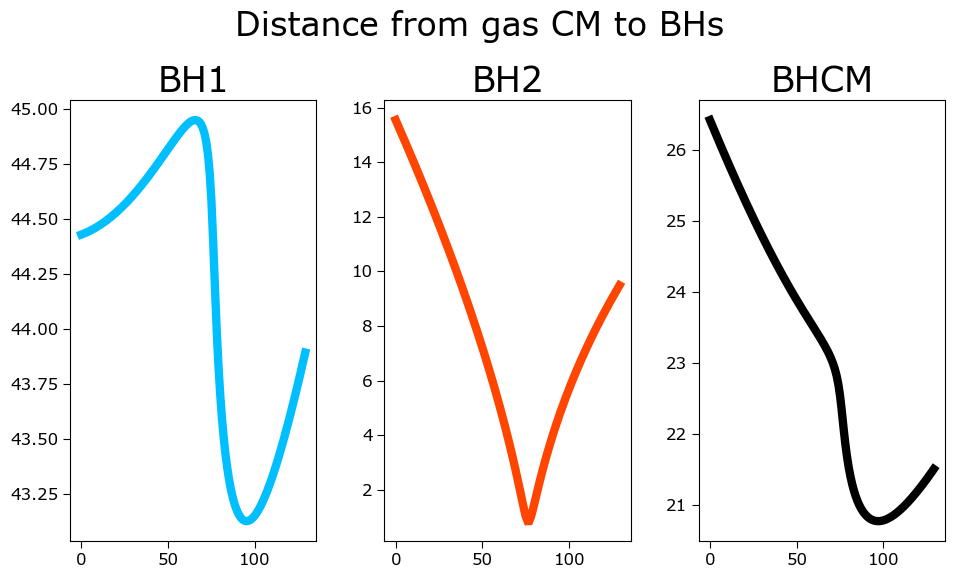

In [99]:
pos_fig = plt.figure(figsize=(10,6))
pos_ax1 = pos_fig.add_subplot(1,3,1)
pos_ax2 = pos_fig.add_subplot(1,3,2)
pos_ax3 = pos_fig.add_subplot(1,3,3)

# subplot 1: gasCM2BH1
pos_ax1.plot(OS.numsnap,d_gasCM2BH1_array, lw=6)
# pos_ax1.set_xlabel('Snapshots')
# pos_ax1.set_ylabel(r'$\rm{L}/\rm{L}_{0} - 1$')
pos_ax1.set_title('BH1')
# pos_ax1.legend()

# subplot 2: gasCM2BH2
pos_ax2.plot(OS.numsnap,d_gasCM2BH2_array, c='orangered', lw=6)
# pos_ax2.set_xlabel('Snapshots')
# pos_ax2.set_ylabel(r'$\rm{L}/\rm{L}_{0} - 1$')
pos_ax2.set_title('BH2')
pos_ax2.legend()

# subplot 2: gasCM2BHCM
pos_ax3.plot(OS.numsnap,d_gasCM2BHCM_array, c='k', lw=6)
# pos_ax2.set_xlabel('Snapshots')
# pos_ax2.set_ylabel(r'$\rm{L}/\rm{L}_{0} - 1$')
pos_ax3.set_title('BHCM')
pos_ax3.legend()


pos_fig.suptitle('Distance from gas CM to BHs')

pos_fig.tight_layout()
pos_fig.subplots_adjust(top=0.83)

# #saving figure
# pos_fig.savefig('Figures/L_tot_change.png')

# angles

In [12]:
angle_file = 'Data_HDF5/OS/OS_angle.hdf5'

In [13]:
OS.write_hdf5(angle_file, list_type='angle', use_init_file=False,
                           init_file=init_filename)

reading snapshot 0
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
reading snapshot 1
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
reading snapshot 2
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,     0,     0,     2], dtype=uint32))
('npart_file: ', array([92976,     0,     0,     0,     0,     2], dtype=int32))
('npart_total:', array([92976,     0,     0,   

In [14]:
angle_list = OS.read_hdf5(angle_file)

angle_gas2BH1_array is index 0
angle_gas2BH2_array is index 1
angle_gasCM2BH1_array is index 2
angle_gasCM2BH2_array is index 3

read file Data_HDF5/OS/OS_angle.hdf5


In [15]:
angle_gas2BH1_array = angle_list[0]
angle_gas2BH2_array = angle_list[1]
angle_gasCM2BH1_array = angle_list[2]
angle_gasCM2BH2_array = angle_list[3]

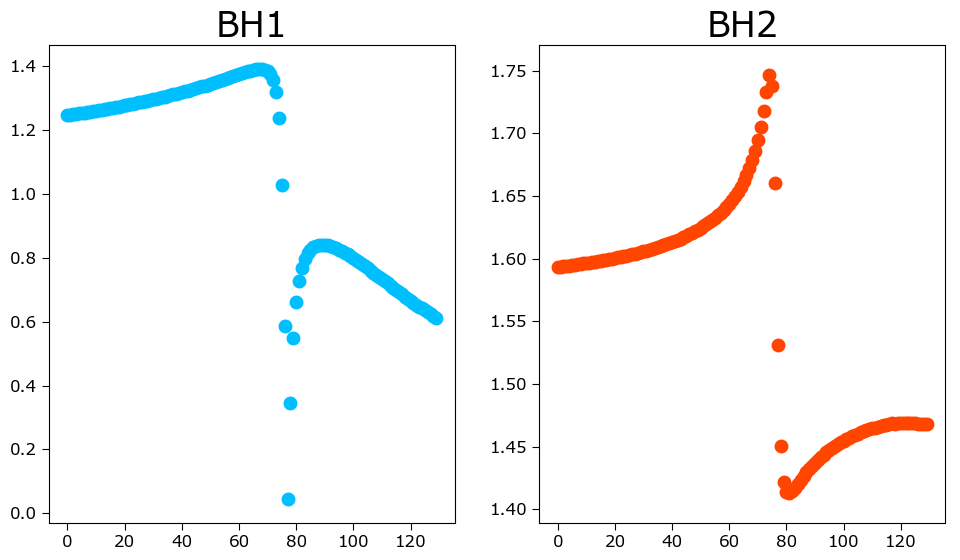

In [16]:
angle_fig = plt.figure(figsize=(10,6))
angle_ax1 = angle_fig.add_subplot(1,2,1)
angle_ax2 = angle_fig.add_subplot(1,2,2)

# subplot 1: gasCM2BH1
angle_ax1.scatter(OS.numsnap,angle_gasCM2BH1_array, lw=4)
# pos_ax1.set_xlabel('Snapshots')
# pos_ax1.set_ylabel(r'$\rm{L}/\rm{L}_{0} - 1$')
angle_ax1.set_title('BH1')
angle_ax1.set_title('BH1')
# pos_ax1.legend()

# subplot 2: gasCM2BH2
angle_ax2.scatter(OS.numsnap,angle_gasCM2BH2_array, c='orangered', lw=4)
# pos_ax2.set_xlabel('Snapshots')
# pos_ax2.set_ylabel(r'$\rm{L}/\rm{L}_{0} - 1$')
angle_ax2.set_title('BH2')
angle_ax2.legend()

# angle_fig.suptitle('Distance from gas CM to BHs')

angle_fig.tight_layout()
# angle_fig.subplots_adjust(top=0.83)

# #saving figure
# angle_fig.savefig('Figures/L_tot_change.png')